# PREDICTING FLOWER SPECIES
## Iris Dataset
### The Iris is a popular dataset in machine learning and statistics. It was introduced by British mathematician and biologist Ronald Fisher in his 1936 paper “The Use of Multiple Measurements in Taxonomic Problems” as an example of discriminant analysis.
### The dataset is a list of iris flowers with 150 specimens, each from one of three varieties: Setosa, Versiclor, and Virginica. Four measurements are taken for each sample: flower and petal length and width, in centimeters.

![Class of Iris Flower](https://miro.medium.com/v2/resize:fit:828/format:webp/1*uo6VfVH87jRjMZWVdwq3Vw.png)iv>

## Importing Libraries

In [229]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [230]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [231]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [232]:
X


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [233]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [234]:
df_iris = pd.concat([X,y], axis = 1)

In [235]:
df_iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Exploration

In [236]:
df_iris.shape

(150, 5)

In [237]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [238]:
df_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [239]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [240]:
from scipy.stats import skew
from scipy.stats import kurtosis

print("kurtosis", kurtosis(X))
print("skewness", skew(X))

kurtosis [-0.57356795  0.2414433  -1.3953593  -1.33524564]
skewness [ 0.31175306  0.33070281 -0.27171195 -0.10394367]


<Axes: xlabel='class', ylabel='count'>

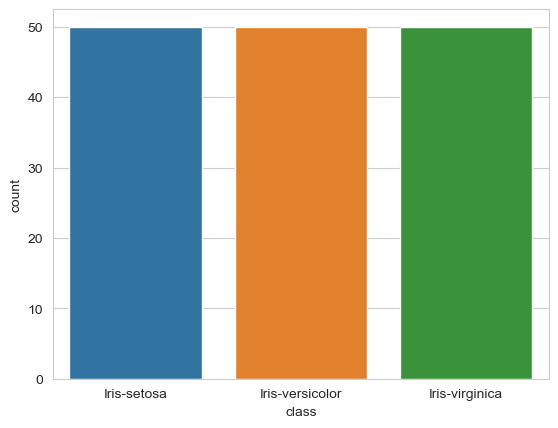

In [241]:
sns.countplot(data = df_iris, x = "class")

In [242]:
duplicate_rows = df_iris[df_iris.duplicated()]
duplicate_rows

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


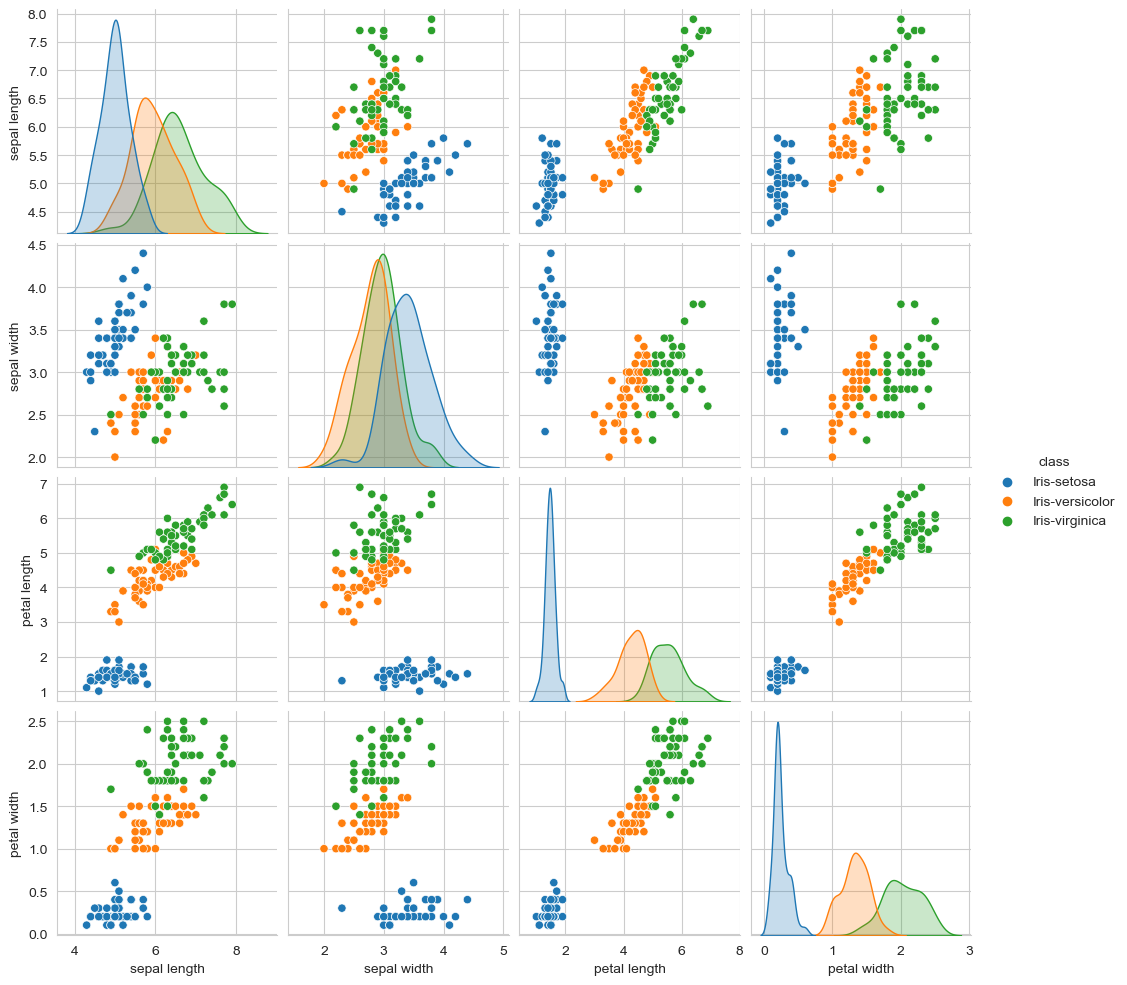

In [243]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data = df_iris, hue = 'class');
plt.show()

Data Insights:
<br>-High co relation between petal length and width columns.
<br>-Setosa has both low petal length and width
<br>-Versicolor has both average petal length and width
<br>-Virginica has both high petal length and width.
<br>-Sepal width for setosa is high and length is low.
<br>-Versicolor have average values for for sepal dimensions.
<br>-Virginica has small width but large sepal length

<Axes: xlabel='class', ylabel='count'>

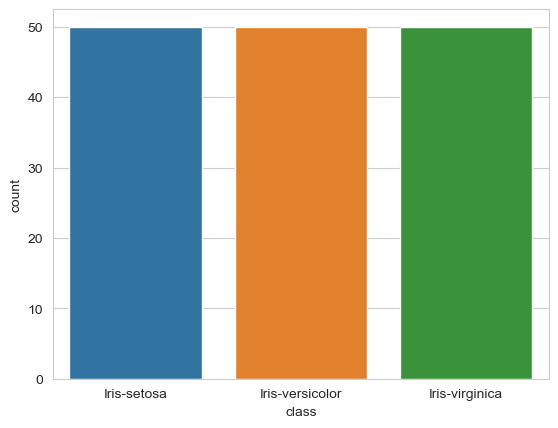

In [244]:
sns.countplot(data = df_iris, x = "class")

In [245]:
X.corr()



,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


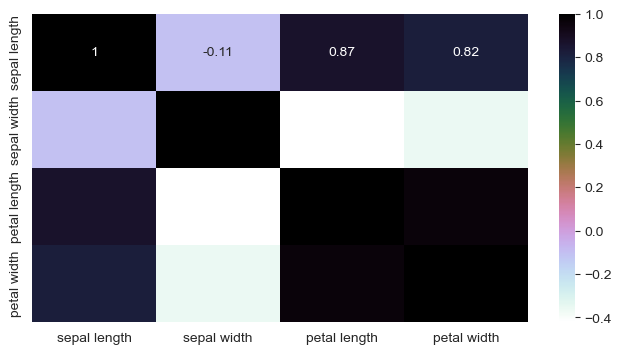

In [246]:
plt.figure(figsize=(8,4))
sns.heatmap(X.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()




Data Insights:
<br>-Petal width and petal length have high correlations. 
<br>-Petal length and sepal width have good correlations.
<br>-Petal Width and Sepal length have good correlations.

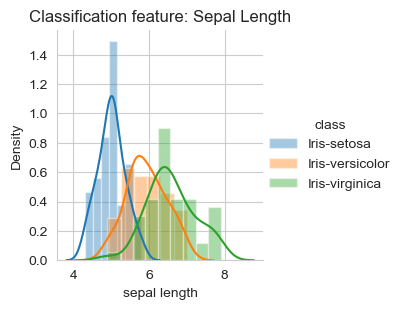

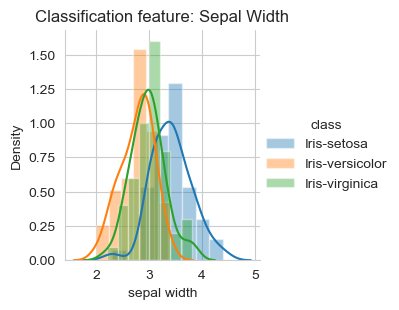

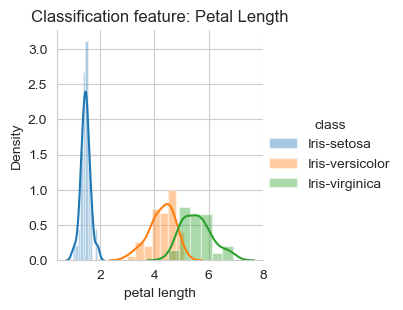

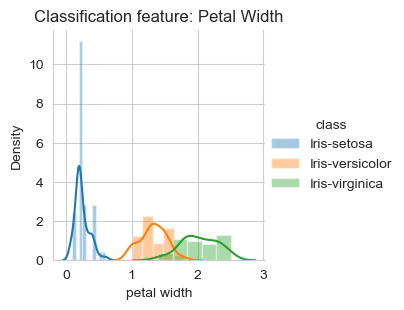

In [247]:

# Plot 1: 
plot = sns.FacetGrid(df_iris, hue="class",) 
plot.map(sns.distplot, "sepal length").add_legend()
plt.title('Classification feature: Sepal Length')

# Plot 2: 
plot = sns.FacetGrid(df_iris, hue="class") 
plot.map(sns.distplot, "sepal width").add_legend() 
plt.title('Classification feature: Sepal Width')

# Plot 3: 
plot = sns.FacetGrid(df_iris, hue="class") 
plot.map(sns.distplot, "petal length").add_legend() 
plt.title('Classification feature: Petal Length') 

# Plot 4:                  
plot = sns.FacetGrid(df_iris, hue="class") 
plot.map(sns.distplot, "petal width").add_legend() 
plt.title('Classification feature: Petal Width')  


# Show the plots
plt.show()



Data Insights:
<br>-Plot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature
<br>-Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature
<br>-Plot 3 shows that petal length is a good Classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two
<br>-Just like Plot 3, Plot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is well separated from the rest two

#### Best plot to choose for classification feature

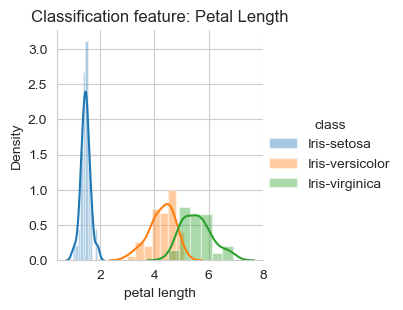

In [248]:
# Plot 3: 
plot = sns.FacetGrid(df_iris, hue="class") 
plot.map(sns.distplot, "petal length").add_legend() 
plt.title('Classification feature: Petal Length') 

# Show the plots
plt.show()

Choosing Plot 3 (Classification feature as Petal Length)to distinguish among the species

Data Insights:
<br>-The pdf curve of Iris Setosa ends roughly at 2.1
<br>-If petal length < 2.1, then species is Iris Setosa
<br>-The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
<br>-If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor
<br>-If petal length > 4.8 then species is Iris Virginica

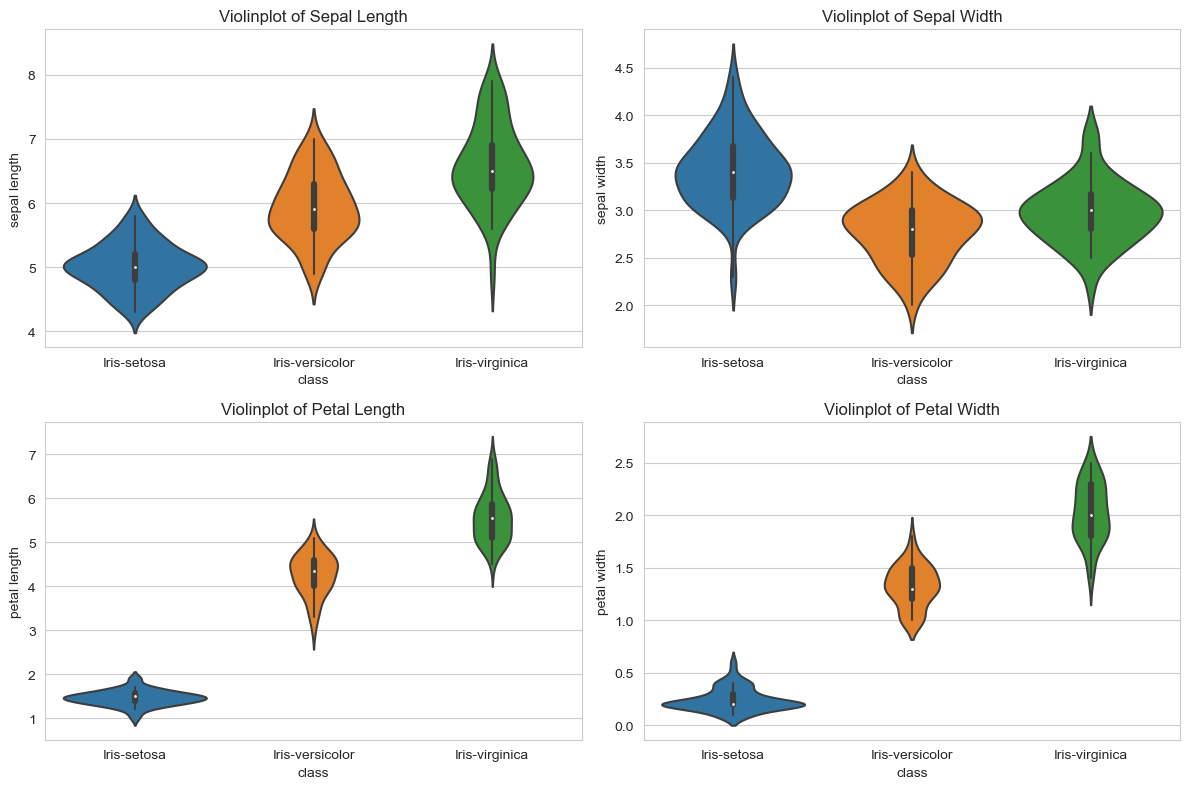

In [249]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: 
sns.violinplot(data = df_iris, x = "class", y = "sepal length",ax = axes[0,0])
axes[0,0].set_title('Violinplot of Sepal Length')

# Plot 2: 
sns.violinplot(data = df_iris, x = "class", y = "sepal width", ax = axes[0,1])
axes[0,1].set_title('Violinplot of Sepal Width')

# Plot 3: 
sns.violinplot(data = df_iris, x = "class", y = "petal length", ax = axes[1,0])
axes[1,0].set_title('Violinplot of Petal Length')
                    
# Plot 4:                  
sns.violinplot(data = df_iris, x = "class", y = "petal width", ax = axes[1,1])
axes[1,1].set_title('Violinplot of Petal Width')
                    
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Data Insights:
<br>-Setosa is having less distribution and density in case of petal length & width
<br>-Versicolor is distributed in a average manner and average features in case of petal length & width
<br>-Virginica is highly distributed with large no .of values and features in case of sepal length & width
<br>-High density values are depicting the mean/median values, for example: Iris Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0) as per the table

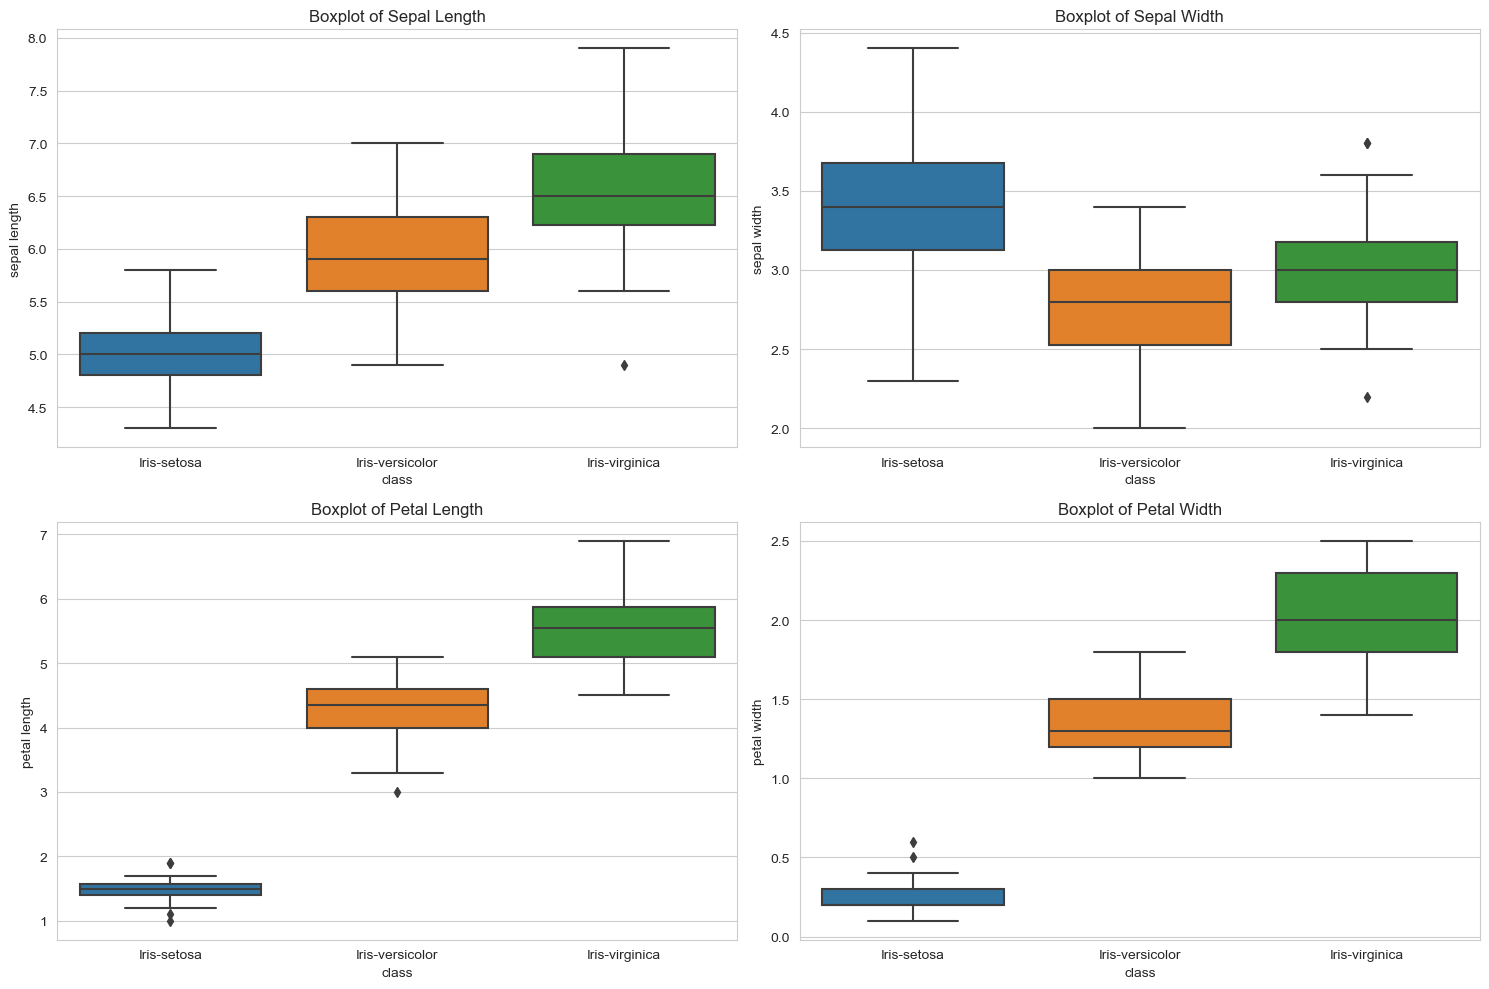

In [250]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: 
sns.boxplot(data = df_iris, y = "sepal length", x ="class" , ax = axes[0,0])
axes[0,0].set_title('Boxplot of Sepal Length')

# Plot 2: 
sns.boxplot(data = df_iris, y = "sepal width", x ="class" , ax = axes[0,1])
axes[0,1].set_title('Boxplot of Sepal Width')

# Plot 3: 
sns.boxplot(data = df_iris, y = "petal length", x ="class", ax = axes[1,0])
axes[1,0].set_title('Boxplot of Petal Length')
                    
# Plot 4:                  
sns.boxplot(data = df_iris, y = "petal width", x ="class" , ax = axes[1,1])
axes[1,1].set_title('Boxplot of Petal Width')
                    
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

According to the box plots:
1) Iris Setosa has smaller petals and sepals with few outliers.
2) Iris Versicolor has larger petals and sepals when compared with Setosa, but smaller than Virginica.
3) Iris Virginica has the largest petals and sepals.


#### Outliers Removal

In [251]:
for column in df_iris.columns[1:-1]:
    for specy in df_iris["class"].unique():
        Specy_type=df_iris[df_iris["class"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index # picking outliers' indeces
        df_iris.drop(index=outliers, inplace=True) # dropping outliers
        print(column,specy,outliers)               

sepal width Iris-setosa Index([], dtype='int64')
sepal width Iris-versicolor Index([], dtype='int64')
sepal width Iris-virginica Index([], dtype='int64')
petal length Iris-setosa Index([], dtype='int64')
petal length Iris-versicolor Index([], dtype='int64')
petal length Iris-virginica Index([], dtype='int64')
petal width Iris-setosa Index([43], dtype='int64')
petal width Iris-versicolor Index([], dtype='int64')
petal width Iris-virginica Index([], dtype='int64')


In [252]:
for column in df_iris.columns[1:-1]:
    for specy in df_iris["class"].unique():
        Specy_type = df_iris[df_iris["class"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        df_iris.drop(index = outlierss, inplace=True) # dropping outliers

Index([], dtype='int64')
Index([], dtype='int64')
Index([117, 119, 131], dtype='int64')
Index([5, 13, 14, 18, 20, 22, 23, 24, 35, 44], dtype='int64')
Index([98], dtype='int64')
Index([118], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


In [253]:
df_iris.to_csv("clean_iris_data.csv")

In [254]:
df_newiris = pd.read_csv("C:/Users/Aditya Saxena/clean_iris_data.csv")

In [255]:
df_newiris

,Unnamed: 0,sepal length,sepal width,petal length,petal width,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
129,145,6.7,3.0,5.2,2.3,Iris-virginica
130,146,6.3,2.5,5.0,1.9,Iris-virginica
131,147,6.5,3.0,5.2,2.0,Iris-virginica
132,148,6.2,3.4,5.4,2.3,Iris-virginica


In [256]:
df_newiris.drop(df_newiris.columns[0:2], axis=1, inplace=True)
df_newiris.head()
print("dropped columns")

dropped columns


#### Data Preprocessing

In [257]:
from sklearn.preprocessing import LabelEncoder
labenc= LabelEncoder()
df_newiris["class"] = labenc.fit_transform(df_newiris["class"]) # transforming Species column into label encoding format

In [258]:
df_newiris.head()

,sepal width,petal length,petal width,class
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [259]:
from sklearn.model_selection import train_test_split

In [260]:
x_train , x_test , y_train , y_test = train_test_split( df_newiris.iloc[:,0:-1] , df_newiris.iloc[:,-1] , test_size=0.2 )

#### Model Prediction

In [261]:
import xgboost as xgb 
xgb_clsfr = xgb.XGBClassifier(objective="multiclass:softmax", num_class=3)
xgb_clsfr.fit(x_train,y_train)
predictions = xgb_clsfr.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

0.9629629629629629

In [262]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  9]], dtype=int64)

In [263]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_train,y_train)
predictions = neigh.predict(x_test)
accuracy = neigh.score(x_test,y_test)
print("Accuracy: ",accuracy)

Accuracy:  1.0


In [264]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  9]], dtype=int64)

In [265]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test,y_test))

Accuracy:  1.0


In [266]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("Accuracy: ",accuracy)

Accuracy:  1.0


In [267]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  9]], dtype=int64)

#### Hyperparameter Tuning

In [268]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, best_predictions)
print(f'Best model accuracy: {best_accuracy:.2f}')

Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best model accuracy: 1.00


#### Cross Validation

In [269]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [1.         0.86363636 0.95238095 0.95238095 1.        ]
Mean CV score: 0.9536796536796537
